## Mengimport Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Dataset

Jikalau ada kendala dalam mengunduh semua library yang diperlukan, bisa mengakses link google collab berikut ini :
https://colab.research.google.com/drive/12q0yWit3HD21eufHeeTLipGskAXGa8yE?usp=sharing
karena seluruh proyek dikerjakan melalui google collab

In [3]:
df = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


Pada dataset yang diperoleh, kita bertugas untuk memisahkan headline berita yang mengandung unsur sarkasme atau tidak. Dataset ini telah memberikan label untuk headline mana saja yang mengandung unsur sarkas. Alasan pemilihan dari dataset ini adalah karena di masa sekarang, penting agar berita yang beredar untuk dapat mempunyai judul yang tidak sarkas atau memicu emosi publik hanya untuk menarik traffic kepada berita mereka.

Lebih lanjut lagi, dataset ini dipilih karena telah memenuhi kriteria pada rubrik yang telah diberikan. Dimana dataset belum pernah untuk dibahas, memiliki jumlah baris lebih dari 28 ribu, serta karena dataset ini berupa kalimat, sehingga setelah dilakukan vektorisasi akan memiliki jumlah fitur yang lebih dari 3. 

# Melakukan Pengecekan Data yang Null / Tidak Valid

Pertama-tama kita akan mencoba melakukan data cleaning untuk kemudian di tindak lanjuti.

In [4]:
# Memerika apakah terdapat missing value pada dataset
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

## EDA : Menvisualisasikan Pesebaran Data

Kemudian pada bagian ini, kita akan memvisualisasikan EDA, dimana pertama-tama kita akan membuat grafik barchart untuk melihat apakah persebaran data berat sebelah. Disini kita dapat melihat bahwa ternyata persebaran data relatif mirip antara headline berita yang sarkas dan yang tidak sarkas.

<Axes: xlabel='is_sarcastic', ylabel='count'>

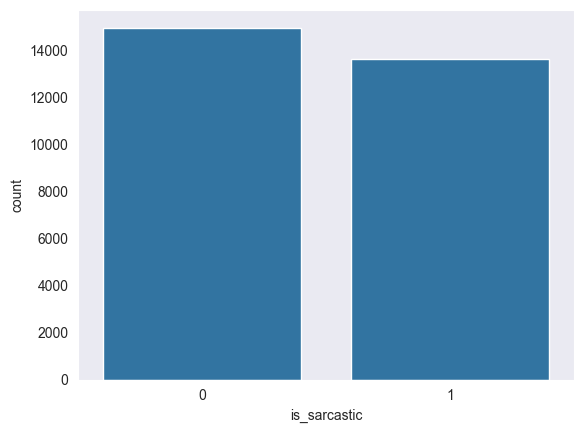

In [5]:
sns.set_style("dark")
sns.countplot(df, x="is_sarcastic")

## Preprocessing : Menghilangkan Stopwords (misalnya, "is", "are" "a", "the", "of"), Tanda Baca, Symbol, ataupun Spasi

Pada bagian ini, kita akan melakukan data preprocessing yaitu kita akan menghilangkan stopwords, maupun tanda baca yang dapat muncul berulang sehingga dapat mempengaruhi vektor kita. Sebagai contoh, jikalau misalnya terdapat string yaitu "  a butter, of love is amazing ", maka setelah dilakukan preprocessing akan menjadi "a butter of love is amazing".

In [6]:
# Melalukan Preprocessing Data - Menghilangkan Character / kata yang tidak diperlukan

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

C:\Users\steph\AppData\Local\Temp\ipykernel_19732\1425215924.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [7]:
df['headline']

0        thirtysomething scientists unveil doomsday clo...
1        dem rep. totally nails congress falling short ...
2             eat veggies: 9 deliciously different recipes
3             inclement weather prevents liar getting work
4        mother comes pretty close using word 'streamin...
                               ...                        
28614               jews celebrate rosh hashasha something
28615    internal affairs investigator disappointed con...
28616    beautiful acceptance speech week came queer ko...
28617    mars probe destroyed orbiting spielberg-gates ...
28618                              dad clarifies food stop
Name: headline, Length: 28619, dtype: object

## EDA : Membuat Gambar Wordcloud untuk Headline Berita yang non-sarcastic

Kemudian pada bagian ini, kita akan melakukan EDA kembali, yaitu kita akan membuat gambar wordcloud yang kiranya dapat memberikan gambaran kasar mengenai persebaran kata yang sering muncul. Disini yang menarik adalah kata yang paling populer dari berita non-sarkas adalah "trump". Sementara kata yang populer dalam berita yang sarkas adalah "man" atau "new". 

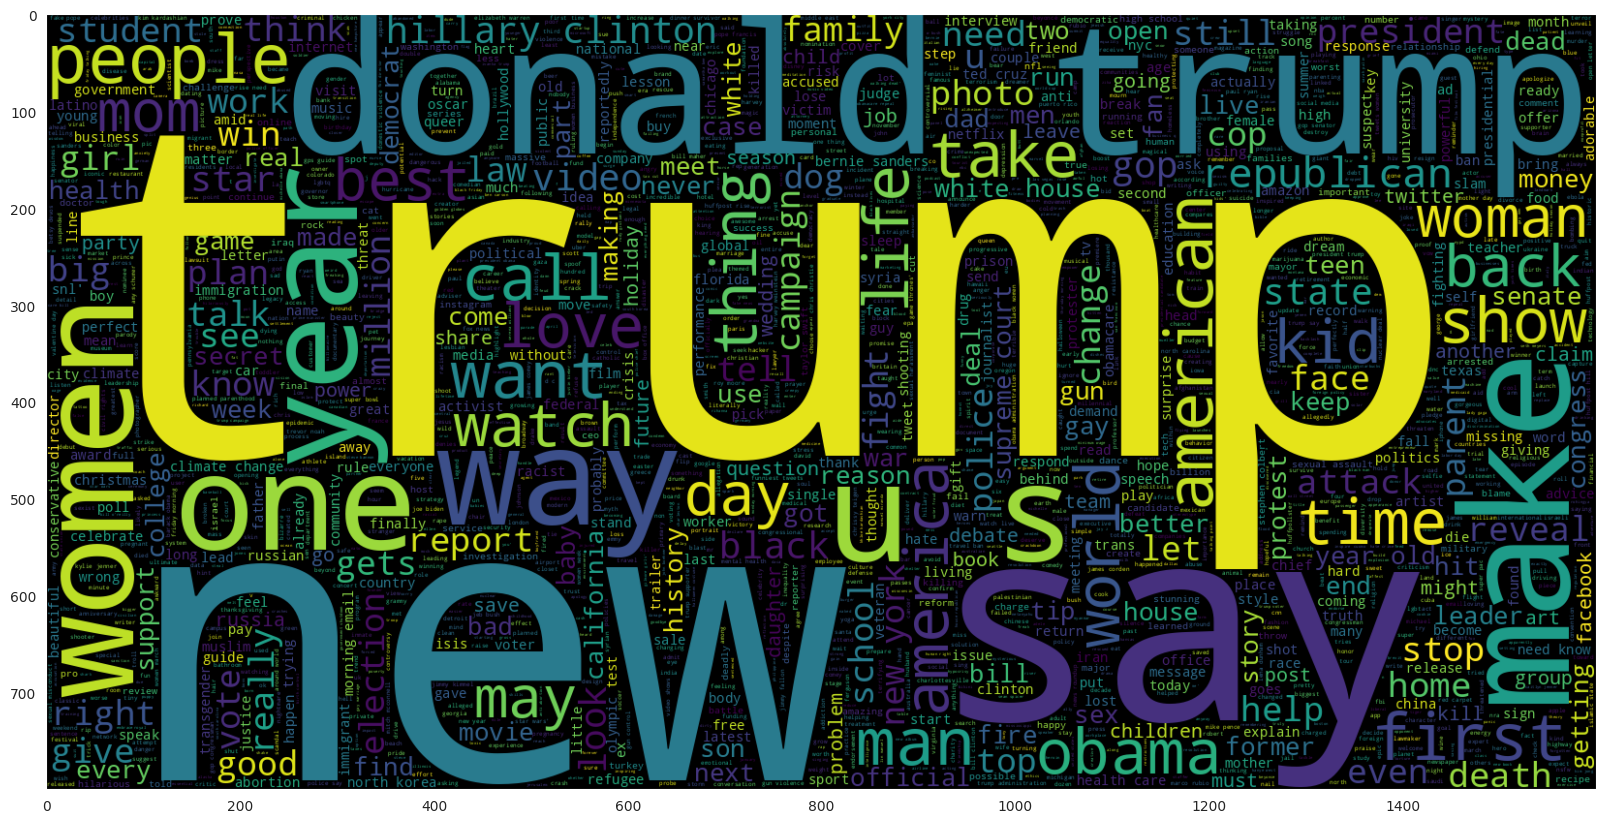

In [134]:
# Mengambil data yang headline beritanya tidak sarkas
non_sarcastic_df = df[df.is_sarcastic == 0]

# Menggabungkan semua headline non-sarcas jadi satu kalimat panjang
all_non_sarcas_str = " ".join(non_sarcastic_df.headline)
all_non_sarcas_str

# Menampilkan wordcloud dari semua headline non-sarcasm
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(all_non_sarcas_str)
plt.imshow(wc , interpolation = 'bilinear')

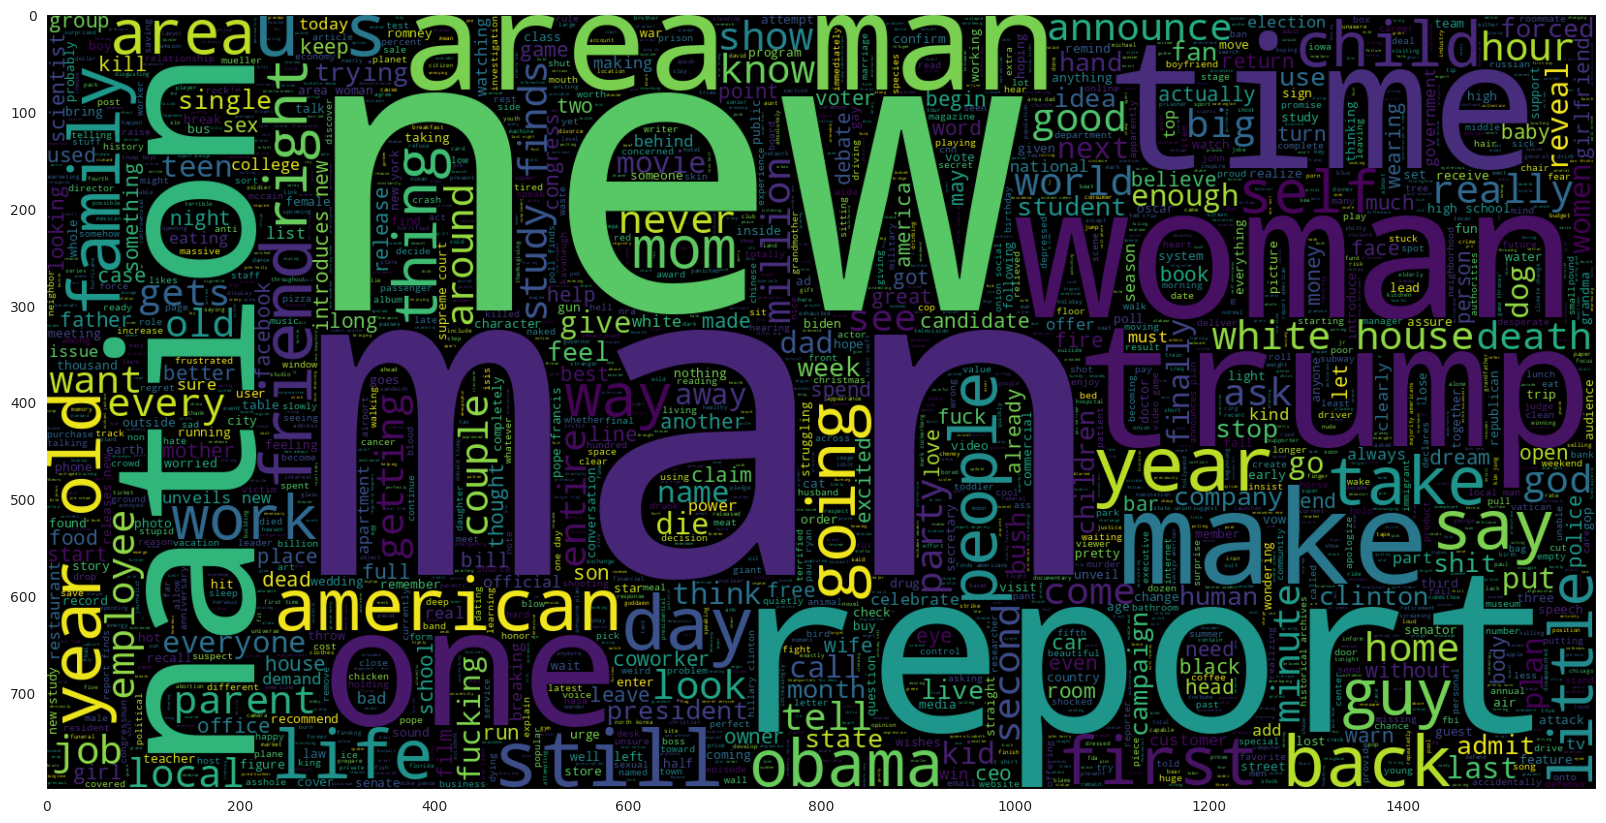

In [135]:
# Mengambil data yang headline beritanya sarkas
sarcastic_df = df[df.is_sarcastic == 1]

# Menggabungkan semua headline non-sarcas jadi satu kalimat panjang
all_sarcas_str = " ".join(sarcastic_df.headline)
all_sarcas_str

# Menampilkan wordcloud dari semua headline non-sarcasm
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(all_sarcas_str)
plt.imshow(wc , interpolation = 'bilinear')

## EDA : Menampilkan kata yang paling sering muncul

Serupa dengan bagian sebelum, kita akan memvisualisasikan EDA, namun dengan membuat sebuah grafik barchart untuk melihat apakah persebaran data berat sebelah. Disini kita dapat melihat bahwa ternyata benar bahwa "trump" merupakan kata yang paling sering muncul untuk headline non-sarcastic semenatara "man" merupakan kata yang sering muncul untuk headline sarcastic.

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

# Fungsi ini menerima input corpus (kumpulan text) dan kemudian akan
# mengurutkannya sesuai dengan frekuensi yang paling sering muncul
def get_top_n_words(corpus, n=None):
  # Mengubah corpus menjadi representasi angka
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)

  # Menghitung jumlah occurance / kejadian suatu kata muncul
  sum_words = bag_of_words.sum(axis=0)

  # Mendapatkan kata serta jumlah munculnya suatu kata
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

  # Mengurutkan dari tinggi ke rendah
  words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)

  # Mengembalikan n kata teratas yang paling banyak muncul
  return words_freq[:n]

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

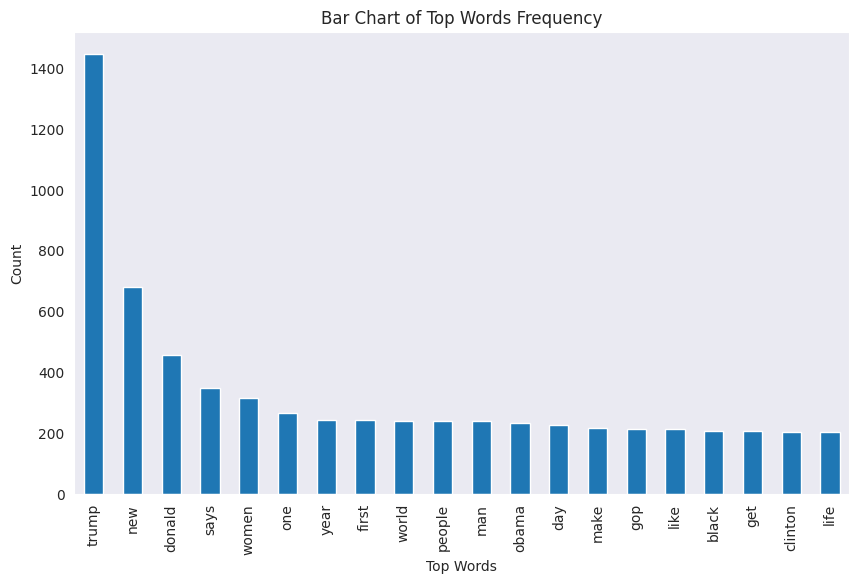

In [137]:
# Menampilkan top words dari headline non sarcastic
common_words = get_top_n_words(non_sarcastic_df.headline , 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])

df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

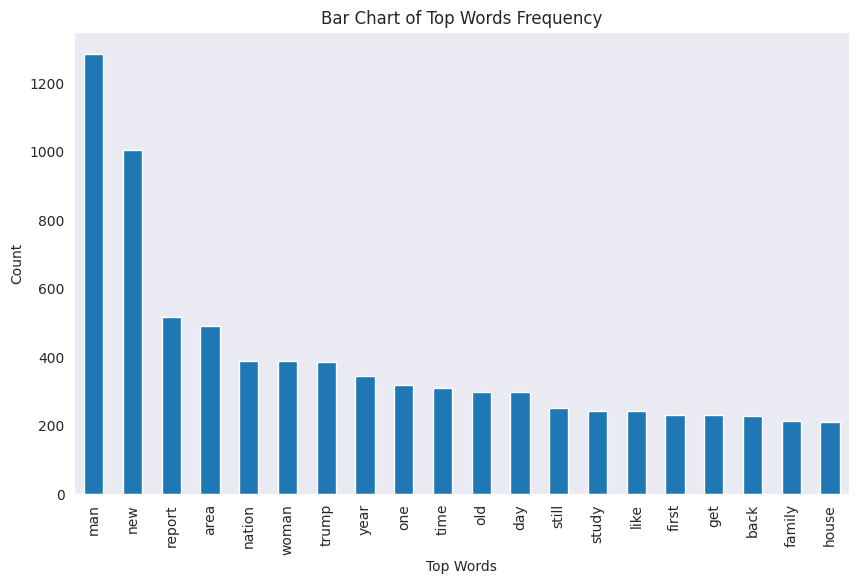

In [138]:
# Menampilkan top words dari headline sarcastic
common_words = get_top_n_words(sarcastic_df.headline , 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])

df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

## Membagi dataset menjadi train dan test

Pada bagian ini, kita akan membagi dataset menjadi 2 bagian yaitu train dan test dengan ukuran test yaitu 20% serta train 80%. 

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['headline'],
													df['is_sarcastic'],
													test_size=0.2, random_state=42)

## Membangun Model

Pada bagian ini, kita akan mulai membagun model-model. Disini kelompok kami akan membangun serta melatih model-model dan kemudian akan memilih 3 model yang memiliki accuracy terbaik. Disini model yang kami pilih antara lain: Logistic Regression, Random Forest, Gini Decision Tree, Entropy Decision Tree, KNN, Linear SVM, RBF SVM.

Lebih lanjut lagi, untuk dapat memperoleh hyperparameter terbaik, kami menggunakan gridsearch untuk mencapainya, meskipun tidak semua model tidak diterapkan gridsearch dengan alasan waktu running yang sangat lama. Selain daripada itu, kelompok kami juga menggunakan pipeline yang didalamnya terdapat transformer yaitu TFID Vectorizer yang akan mengubah sebuah kalimat menjadi vektor.

Kemudian, kami juga menggunakan K-Fold Cross Validation serta Stratified K-Fold Cross Validation untuk mencoba mendapatkan accuracy yang lebih tinggi.

In [140]:
log_reg = LogisticRegression()

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

gini_tree = DecisionTreeClassifier(criterion = "gini",
            random_state = 42, max_depth=1000, min_samples_leaf=6)

param_grid = {"min_samples_leaf":[2,4,6],'max_depth':[1000, 10_000]}
gini_grid = GridSearchCV(gini_tree,param_grid)


entropy_tree = model_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 42,
            max_depth = 1000, min_samples_leaf = 6)

param_grid = {"min_samples_leaf":[2,4,6],'max_depth':[1000, 10_000]}
entropy_grid = GridSearchCV(entropy_tree,param_grid)


KNN = KNeighborsClassifier() #'minkowski', 'manhattan'.
param_grid = {"n_neighbors":[2,4,5,10,20],'metric':['euclidean', 'minkowski']}
grid = GridSearchCV(KNN,param_grid)

SVM_linear = SVC(kernel = 'linear', random_state = 42)
SVM_RBF = SVC(kernel = 'rbf', random_state = 42)

algo_names = [
    "Logistic Regression",
    "Random Forest",
    "Gini Decision Tree",
    "Entropy Decision Tree",
    "KNN",
    "Linear SVM",
    "RBF SVM"
]

algorithms = [log_reg, forest, gini_grid, entropy_grid, grid, SVM_linear, SVM_RBF]

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer(stop_words='english', max_df=0.7)

TfidfVectorizer(max_df=0.7, stop_words='english')

## Warning, This Code Below Took 1 Hour To Complete

Pada bagian code dibawah ini, setiap model akan di fit train data dan model akan dipakai untuk memprediksi data test. Kemudian hasil dari prediksi tersebut akan diukur accuracy, f1-score, recall score serta visualisasi confusion matrix untuk melihat persebaran hasil true positive true negative, false postive, dan false negative.

Logistic Regression  : 

Accuracy :  0.8001397624039134

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2995
           1       0.81      0.76      0.78      2729

    accuracy                           0.80      5724
   macro avg       0.80      0.80      0.80      5724
weighted avg       0.80      0.80      0.80      5724

5-Fold Cross Validation Accuracy: 78.60 %
5-Fold Cross Validation Standard Deviation: 0.31 %
Stratified K Fold Validation Accuracy: 77.19 %
Stratified K Fold Validation Standard Deviation: 0.05 %


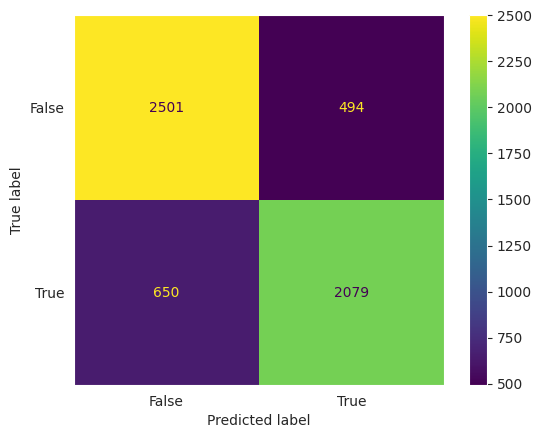


--------------------------------------------------

Random Forest  : 

Accuracy :  0.7472047519217331

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      2995
           1       0.80      0.63      0.70      2729

    accuracy                           0.75      5724
   macro avg       0.76      0.74      0.74      5724
weighted avg       0.76      0.75      0.74      5724

5-Fold Cross Validation Accuracy: 73.78 %
5-Fold Cross Validation Standard Deviation: 0.42 %
Stratified K Fold Validation Accuracy: 72.41 %
Stratified K Fold Validation Standard Deviation: 0.06 %


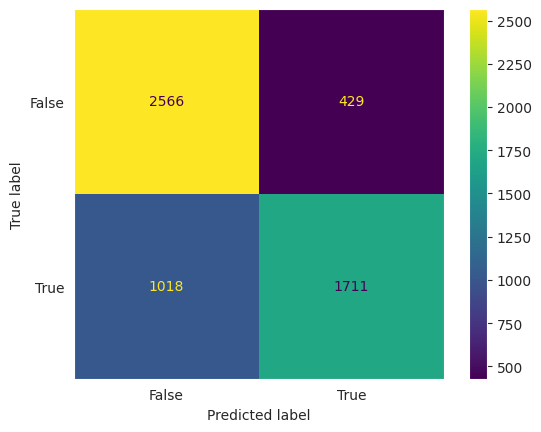


--------------------------------------------------

Gini Decision Tree  : 

Accuracy :  0.6923480083857443

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      2995
           1       0.72      0.59      0.65      2729

    accuracy                           0.69      5724
   macro avg       0.70      0.69      0.69      5724
weighted avg       0.70      0.69      0.69      5724

5-Fold Cross Validation Accuracy: 69.63 %
5-Fold Cross Validation Standard Deviation: 0.29 %
Stratified K Fold Validation Accuracy: 68.17 %
Stratified K Fold Validation Standard Deviation: 0.78 %


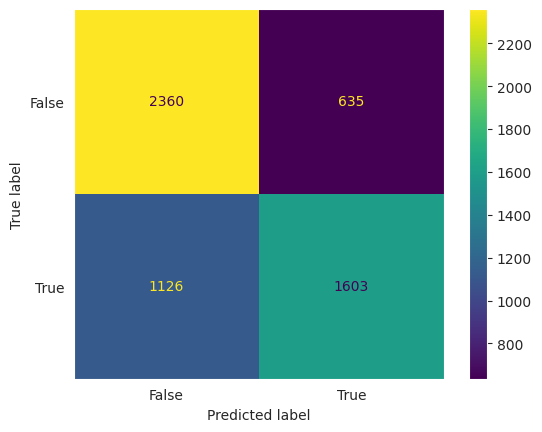


--------------------------------------------------

Entropy Decision Tree  : 

Accuracy :  0.6984626135569532

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      2995
           1       0.71      0.62      0.66      2729

    accuracy                           0.70      5724
   macro avg       0.70      0.69      0.69      5724
weighted avg       0.70      0.70      0.70      5724

5-Fold Cross Validation Accuracy: 69.84 %
5-Fold Cross Validation Standard Deviation: 0.62 %
Stratified K Fold Validation Accuracy: 68.54 %
Stratified K Fold Validation Standard Deviation: 0.32 %


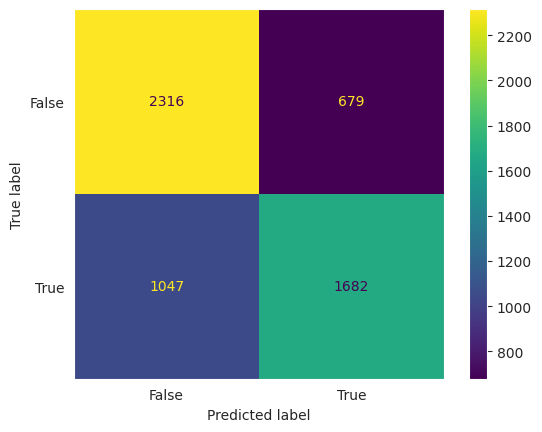


--------------------------------------------------

KNN  : 

Accuracy :  0.6757512229210343

              precision    recall  f1-score   support

           0       0.63      0.95      0.75      2995
           1       0.86      0.38      0.53      2729

    accuracy                           0.68      5724
   macro avg       0.74      0.66      0.64      5724
weighted avg       0.74      0.68      0.65      5724

5-Fold Cross Validation Accuracy: 67.96 %
5-Fold Cross Validation Standard Deviation: 1.08 %
Stratified K Fold Validation Accuracy: 68.88 %
Stratified K Fold Validation Standard Deviation: 0.46 %


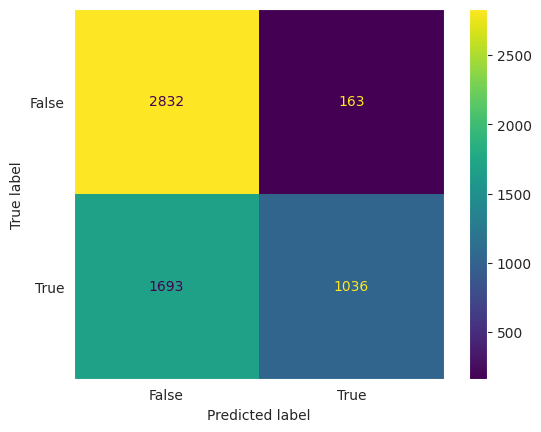


--------------------------------------------------

Linear SVM  : 

Accuracy :  0.800314465408805

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2995
           1       0.80      0.78      0.79      2729

    accuracy                           0.80      5724
   macro avg       0.80      0.80      0.80      5724
weighted avg       0.80      0.80      0.80      5724

5-Fold Cross Validation Accuracy: 78.65 %
5-Fold Cross Validation Standard Deviation: 0.25 %
Stratified K Fold Validation Accuracy: 77.24 %
Stratified K Fold Validation Standard Deviation: 0.05 %


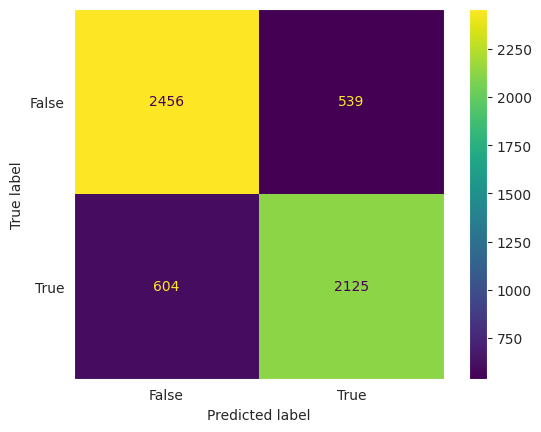


--------------------------------------------------

RBF SVM  : 

Accuracy :  0.806953179594689

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2995
           1       0.81      0.77      0.79      2729

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724

5-Fold Cross Validation Accuracy: 79.35 %
5-Fold Cross Validation Standard Deviation: 0.23 %
Stratified K Fold Validation Accuracy: 77.58 %
Stratified K Fold Validation Standard Deviation: 0.00 %


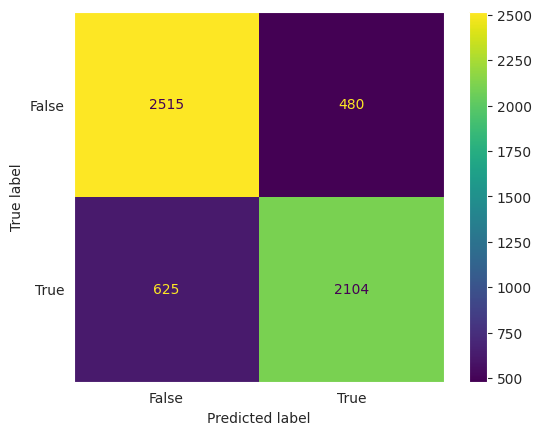


--------------------------------------------------



In [142]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
results = []
for i in range(len(algorithms)):
  pipe = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english', max_df=0.7)), (algo_names[i], algorithms[i])])
  pipe.fit(x_train, y_train)

  acc = accuracy_score(y_test, pipe.predict(x_test))
  pre_score = precision_score(y_test, pipe.predict(x_test))
  rec_score = recall_score(y_test, pipe.predict(x_test))
  f_score = f1_score(y_test, pipe.predict(x_test))

  print(algo_names[i], " : ")
  print()
  print("Accuracy : ", acc)
  print()
  print(classification_report(y_test, pipe.predict(x_test)))


  # Mencoba menggunakan 5-Fold Cross Validation
  accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5)
  print("5-Fold Cross Validation Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("5-Fold Cross Validation Standard Deviation: {:.2f} %".format(accuracies.std()*100))

  # Mencoba menggunakan Stratified Cross Validation
  skf = StratifiedKFold(n_splits=2)
  stratified_accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = skf)
  print("Stratified K Fold Validation Accuracy: {:.2f} %".format(stratified_accuracies.mean()*100))
  print("Stratified K Fold Validation Standard Deviation: {:.2f} %".format(stratified_accuracies.std()*100))

  results.append(list([acc, pre_score, rec_score, f_score, accuracies.mean(), stratified_accuracies.mean()]))

  cm = metrics.confusion_matrix(y_test, pipe.predict(x_test))

  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])


  cm_display.plot()
  plt.show()

  print()
  print("-" * 50)
  print()

## Membandingkan 7 algoritma

Setelahnya, kita akan membandingkan ke-7 algoritma tersebut dan membandingkannya ke dalam sebuah dataframe. Disini, kita dapat melihat bahwa accuracy tertinggi dipegang oleh logistic regression & SVM, baik pada kernel linear maupun RBF. 

Di sisi lain, hal yang menarik adalah ternyata 5-Fold Cross & Stratified K-Fold Cross tidak menghasilkan peningkatan performa yang baik terhadap accuracy kita. Kita malah melihat bahwa ternyata terdapat penurunan akurasi dibandingkan sebelumnya.

In [143]:
df1 = pd.DataFrame(data=results, index=algo_names, columns=["accuracy", "precision", "recall", "f1-score", "5-Fold Cross Accuracy", "Stratified K Fold Cross Accuracy"])
df1

,accuracy,precision,recall,f1-score,5-Fold Cross Accuracy,Stratified K Fold Cross Accuracy
Logistic Regression,0.800140,0.808006,0.761818,0.784232,0.785979,0.771872
Random Forest,0.747205,0.799533,0.626970,0.702814,0.737847,0.724088
Gini Decision Tree,0.692348,0.716265,0.587395,0.645460,0.696309,0.681721
Entropy Decision Tree,0.698463,0.712410,0.616343,0.660904,0.698449,0.685390
KNN,0.675751,0.864053,0.379626,0.527495,0.679624,0.688753
Linear SVM,0.800314,0.797673,0.778674,0.788059,0.786504,0.772439
RBF SVM,0.806953,0.814241,0.770978,0.792020,0.793492,0.775846


## Mencoba Menggunakan RNN

Selain itu, kelompok kami juga mencoba untuk memasukkan sebuah algoritma deep learning yaitu RNN. Pemilihan algoritma ini adalah karena RNN merupakan sebuah algoritma yang kami rasa cocok untuk NLP dimana RNN ini baik untuk menyimpan informasi jangka panjang sehingga sangat berguna dalam tugas-tugas NLP yang memerlukan pemahaman konteks yang lebih panjang.

### Mempersiapkan Data

Jika sebelumnya, kita menggunakan TFID Vectorizer, pada kali ini kelompok kami mencoba untuk menggunakan Word2Vec untuk mengubah kalimat tersebut menjadi vector.

In [144]:
# Untuk sebelum melakukan RNN kita perlu untuk mengubah
# representasi string menjadi vector.
# Untuk itu, kita perlu untuk memisahkan kalimat per-kata nya agar dapat
# memakai Word2Vec.

words = []
for i in df.headline.values:
    words.append(i.split())

In [145]:
# Kemudian kita instead menggunakan TF-ID Vectorizer seperti sebelumnya,
# kita akan coba menggunakan algoritma Word2Vec untuk
# mengubah kata menjadi representasi vector

import gensim
# Menetapkan dimensi vectornya
EMBEDDING_DIM = 200
w2v_model = gensim.models.Word2Vec(sentences = words , vector_size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [146]:
# Mengubah text menjadi sebuah barisan token
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [147]:
# Fungsi untuk membuat matrix bobot dari word2vec gensim model

def get_weight_matrix(model, vocab):
    # Membuat sebuah vector berisi 0 yang akan dugunakan sebagai
    # matrix bobot
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

    # Mengisi matrix tersebut dengan vector yang telah didapatkan
    # dari traning Word2Vec untuk setiap kata yang ada di vocabulary kita.
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [148]:
# Mengekstrak embedding vector dari model Word2Vec yang telah dilatih
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

### Membangun Model

Disini kami menggunakan Long Short-Term Memory (LSTM) dan Gated Recurrent Unit (GRU) yang telah dikembangkan untuk mengatasi masalah seperti vanishing gradient dan exploding gradient yang sering terjadi dalam pelatihan RNN tradisional.

In [149]:
# Membangun model RNN

vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

### Evaluasi Model

Pada bagian ini, kita akan mengevaluasi hasil model yang telah dihasilkan, serta menampilkan visualisasi grafik antara train & test accuracy serta train & test loss.|

In [150]:
# Menampilkan Ringkasan Model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 200)           7614400   
                                                                 
 bidirectional_4 (Bidirecti  (None, 20, 256)           336896    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                55680     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8007041 (30.54 MB)
Trainable params: 8007041 (30.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [151]:
# Membagi Training dan Testing Data
x_train, x_test, y_train, y_test = train_test_split(x, df.is_sarcastic , test_size = 0.3 , random_state = 0)

In [152]:
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
157/157 [==============================] - 113s 639ms/step - loss: 0.5031 - acc: 0.7461 - val_loss: 0.4101 - val_acc: 0.8170
Epoch 2/3
157/157 [==============================] - 101s 643ms/step - loss: 0.1461 - acc: 0.9456 - val_loss: 0.5522 - val_acc: 0.7980
Epoch 3/3
157/157 [==============================] - 101s 644ms/step - loss: 0.0386 - acc: 0.9871 - val_loss: 0.8096 - val_acc: 0.7980


In [153]:
# Menampilkan Akurasi Model
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

627/627 [==============================] - 18s 28ms/step - loss: 0.0112 - acc: 0.9973
Accuracy of the model on Training Data is -  99.72545504570007
269/269 [==============================] - 8s 31ms/step - loss: 0.8096 - acc: 0.7980
Accuracy of the model on Testing Data is -  79.80433106422424


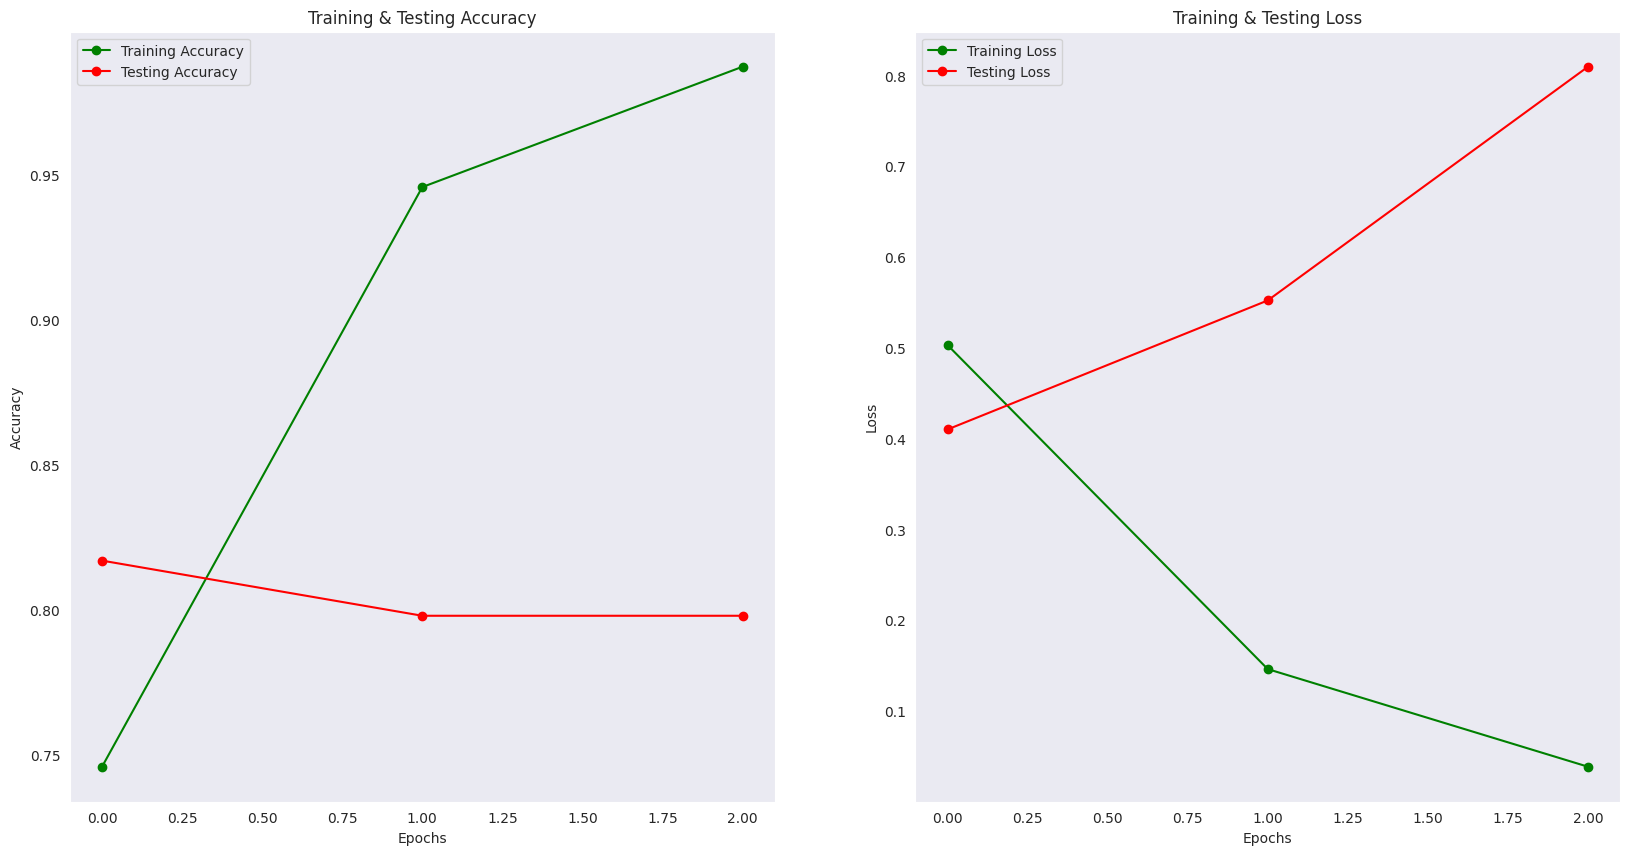

In [154]:
# Menampilkan Grafik Evaluasi Model Train & Test

epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [155]:
# Kita akan membuat threshold, jikalau peluang dari predikisi lebih dari 50%
# Maka akan menjadi 1, dan jikalau dibawahnya menjadi 0.

pred_probabilities = model.predict(x_test)
pred_classes = np.where(pred_probabilities > 0.5, 1,0)
pred_classes[:5]
# classes_x
# predict_x

269/269 [==============================] - 8s 26ms/step


array([[1],
       [0],
       [1],
       [0],
       [1]])

In [156]:
cm = confusion_matrix(y_test, pred_classes)
cm

array([[3722,  838],
       [ 896, 3130]])

In [157]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      4560
           1       0.79      0.78      0.78      4026

    accuracy                           0.80      8586
   macro avg       0.80      0.80      0.80      8586
weighted avg       0.80      0.80      0.80      8586



In [158]:
# Memperoleh Hasil Evaluasi Model
acc = accuracy_score(y_test, pred_classes)
pre_score = precision_score(y_test, pred_classes)
rec_score = recall_score(y_test, pred_classes)
f_score = f1_score(y_test, pred_classes)

In [159]:
results.append(list([acc, pre_score, rec_score, f_score, np.nan, np.nan]))

In [160]:
print(results)

[[0.8001397624039134, 0.8080062184220754, 0.7618175155734701, 0.7842323651452282, 0.7859794715003277, 0.7718715662625741], [0.7472047519217331, 0.7995327102803739, 0.6269695859289117, 0.7028137194495789, 0.7378466914173399, 0.7240882531451578], [0.6923480083857443, 0.7162645218945487, 0.5873946500549652, 0.6454600362391785, 0.6963092378248525, 0.6817205576674976], [0.6984626135569532, 0.7124099957645066, 0.6163429827775742, 0.6609037328094302, 0.6984494431098492, 0.6853896832404219], [0.6757512229210343, 0.8640533778148457, 0.37962623671674606, 0.5274949083503055, 0.6796243721336536, 0.688752800025054], [0.800314465408805, 0.7976726726726727, 0.7786735067790399, 0.7880585944743186, 0.7865036034068574, 0.7724393739213269], [0.806953179594689, 0.8142414860681114, 0.7709783803591059, 0.7920195746282702, 0.7934920288272548, 0.7758462542131247], [0.7980433263452131, 0.7888104838709677, 0.7774465971187282, 0.7830873154866148, nan, nan]]


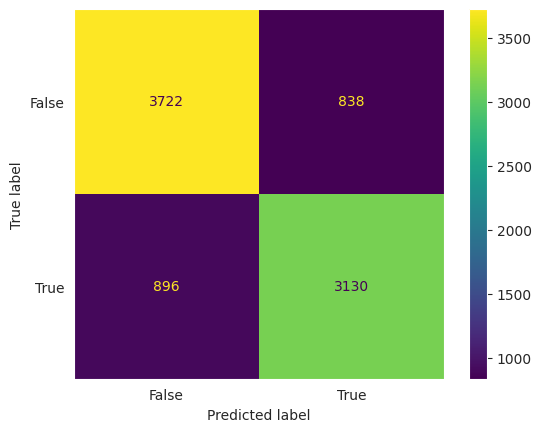

In [161]:
# Menampilkan Confusion Matrix untuk Algoritma RNN
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
              display_labels=[False, True])
cm_display.plot()
plt.show()

## Evaluasi Final

Pada bagian ini kita kemudian akan memasukkan hasil accuracy dan evaluasi tiap model ke dalam dataframe. Disini kita dapat melihat bahwa ternyata RNN tidak terlalu buruk untuk memprediksi dataset kami meskipun memang masih kurang sempurna jikalau dibandingkan dengan Logistic Regression dan SVM.

In [162]:
# Membandingkan Semua Model
df2 = pd.DataFrame(data=results, index=algo_names+['RNN'], columns=["accuracy", "precision", "recall", "f1-score", "5-Fold Cross Accuracy", "Stratified K Fold Cross Accuracy"])
df2

,accuracy,precision,recall,f1-score,5-Fold Cross Accuracy,Stratified K Fold Cross Accuracy
Logistic Regression,0.800140,0.808006,0.761818,0.784232,0.785979,0.771872
Random Forest,0.747205,0.799533,0.626970,0.702814,0.737847,0.724088
Gini Decision Tree,0.692348,0.716265,0.587395,0.645460,0.696309,0.681721
Entropy Decision Tree,0.698463,0.712410,0.616343,0.660904,0.698449,0.685390
KNN,0.675751,0.864053,0.379626,0.527495,0.679624,0.688753
Linear SVM,0.800314,0.797673,0.778674,0.788059,0.786504,0.772439
RBF SVM,0.806953,0.814241,0.770978,0.792020,0.793492,0.775846
RNN,0.798043,0.788810,0.777447,0.783087,NaN,NaN


## Kesimpulan Akhir

Sehingga berdasarkan data diatas algoritma final yang kami pilih adalah Logistic Regression, SVM, dan RNN. Serta bahwa ternyata dalam kasusu ini K-Fold Cross Validation tidak menghasilkan peningkatan performa yang baik.

Proyek ini juga sudah menggunakan github untuk menyimpan lebih dari 5 versi kode pemrograman yang dapat diakses melalui link : https://github.com/StephenJP14/Sarcasm-Detection-Models